In [ ]:
import pandas as pd
from data import citylearn_challenge_2022_phase_1 as competition_data
import os.path as osp


consumptions_path = osp.join(osp.dirname(competition_data.__file__), "consumptions/building_consumptions.csv")
consumptions = pd.read_csv(consumptions_path)[[f"{i}" for i in range(5)]]
# consumptions

In [ ]:
consumption_building_1 = consumptions["0"].to_frame()
consumption_building_2 = consumptions["1"].to_frame()
consumption_building_3 = consumptions["2"].to_frame()
consumption_building_4 = consumptions["3"].to_frame()
consumption_building_5 = consumptions["4"].to_frame()

In [ ]:
data = consumption_building_4
data = data.rename(columns={"3":"Consumption"})
# data

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster


forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=data.Consumption)

In [ ]:
from matplotlib import pyplot as plt
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = data.Consumption,
                          initial_train_size = None,
                          fixed_train_size   = False,
                          steps              = 12,
                          metric             = 'mean_absolute_error',
                          refit              = False,
                          verbose            = True
                      )

fig, ax = plt.subplots(figsize=(12, 3.5))
data.loc[predictions[1000:1168].index, 'Consumption'].plot(ax=ax, linewidth=2, label='real')
predictions[1000:1168].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real consumption')
ax.legend();

In [ ]:


# Lags used as predictors
lags_grid = [ [1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 25], [1, 2, 25, 26], [1, 2, 3, 25, 26, 27], [1, 2, 3, 4, 25, 26, 27, 28], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33], [1, 25, 49], [1, 2, 25, 26, 49, 50], [1, 2, 3, 25, 26, 27, 49, 50, 51], [1, 2, 3, 4, 25, 26, 27, 28, 49, 50, 51, 52], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29, 49, 50, 51, 52, 53], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32, 49, 50, 51, 52, 53, 54, 55, 56], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33, 49, 50, 51, 52, 53, 54, 55, 56, 57]]

# Regressor's hyperparameters
param_grid = {'alpha': np.logspace(-3, 5, 10),
              'tol': np.logspace(-1, -10, 10),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data.Consumption,
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 12,
                   metric             = 'mean_squared_error',
                   refit              = False,
                   initial_train_size = len(data) - 1,
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False
               )
results_grid

In [ ]:
nsload_data_path = osp.join(osp.dirname(competition_data.__file__), "load_data.csv")
df_loads = pd.read_csv(nsload_data_path)
df_load_1 = df_loads[:8760]
df_load_2 = df_loads[8760:8760*2]
df_load_3 = df_loads[8760*2:8760*3]
df_load_4 = df_loads[8760*3:8760*4]
df_load_5 = df_loads[8760*4:8760*5]


In [ ]:
df_load_1 = df_load_4["non_shiftable_load"].to_frame()
# df_load_1

In [ ]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=df_load_1.non_shiftable_load)

In [ ]:
from matplotlib import pyplot as plt
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = df_load_1.non_shiftable_load,
                          initial_train_size = None,
                          fixed_train_size   = False,
                          steps              = 12,
                          metric             = 'mean_absolute_error',
                          refit              = False,
                          verbose            = True
                      )

fig, ax = plt.subplots(figsize=(12, 3.5))
df_load_1.loc[predictions[1000:1168].index, 'non_shiftable_load'].plot(ax=ax, linewidth=2, label='real')
predictions[1000:1168].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real load')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

# Lags used as predictors
lags_grid = [ [1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 25], [1, 2, 25, 26], [1, 2, 3, 25, 26, 27], [1, 2, 3, 4, 25, 26, 27, 28], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33], [1, 25, 49], [1, 2, 25, 26, 49, 50], [1, 2, 3, 25, 26, 27, 49, 50, 51], [1, 2, 3, 4, 25, 26, 27, 28, 49, 50, 51, 52], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29, 49, 50, 51, 52, 53], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32, 49, 50, 51, 52, 53, 54, 55, 56], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33, 49, 50, 51, 52, 53, 54, 55, 56, 57]]

# Regressor's hyperparameters
param_grid = {'alpha': np.logspace(-3, 5, 10),
              'tol': np.logspace(-1, -10, 10),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = df_load_1.non_shiftable_load,
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 12,
                   metric             = 'mean_squared_error',
                   refit              = False,
                   initial_train_size = len(df_load_1) - 1,
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False
               )
results_grid

In [53]:
nsload_data_path = osp.join(osp.dirname(competition_data.__file__), "solar_data.csv")
df_solars = pd.read_csv(nsload_data_path)
df_solar_1 = df_solars[:8760]
df_solar_2 = df_solars[8760:8760*2]
df_solar_3 = df_solars[8760*2:8760*3]
df_solar_4 = df_solars[8760*3:8760*4]
df_solar_5 = df_solars[8760*4:8760*5]

In [54]:
df_solar_1 = df_solar_3["solar_generation"].to_frame()

In [55]:
forecaster = ForecasterAutoreg(
    regressor=Ridge(random_state=123),
    lags=24,  # This value will be replaced in the grid search
    transformer_y=StandardScaler()
)

forecaster.fit(y=df_solar_1.solar_generation)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 8736
    Number of folds: 728
    Number of steps per fold: 12

Data partition in fold: 0
    Training:   17520 -- 17543  (n=24)
    Validation: 17544 -- 17555  (n=12)
Data partition in fold: 1
    Training:   17520 -- 17543  (n=24)
    Validation: 17556 -- 17567  (n=12)
Data partition in fold: 2
    Training:   17520 -- 17543  (n=24)
    Validation: 17568 -- 17579  (n=12)
Data partition in fold: 3
    Training:   17520 -- 17543  (n=24)
    Validation: 17580 -- 17591  (n=12)
Data partition in fold: 4
    Training:   17520 -- 17543  (n=24)
    Validation: 17592 -- 17603  (n=12)
Data partition in fold: 5
    Training:   17520 -- 17543  (n=24)
    Validation: 17604 -- 17615  (n=12)
Data partition in fold: 6
    Training:   17520 -- 17543  (n=24)
    Validation: 17616 -- 17627  (n=12)
Data partition in fold: 7
    Training: 

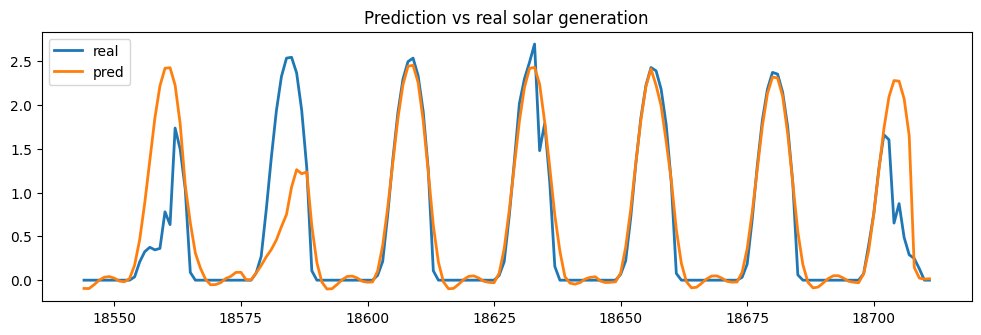

In [56]:

from matplotlib import pyplot as plt
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
    forecaster=forecaster,
    y=df_solar_1.solar_generation,
    initial_train_size=None,
    fixed_train_size=False,
    steps=12,
    metric='mean_absolute_error',
    refit=False,
    verbose=True
)

fig, ax = plt.subplots(figsize=(12, 3.5))
df_solar_1.loc[predictions[1000:1168].index, 'solar_generation'].plot(ax=ax, linewidth=2, label='real')
predictions[1000:1168].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real solar generation')
ax.legend();


In [ ]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

# Lags used as predictors
lags_grid = [ [1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 25], [1, 2, 25, 26], [1, 2, 3, 25, 26, 27], [1, 2, 3, 4, 25, 26, 27, 28], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33], [1, 25, 49], [1, 2, 25, 26, 49, 50], [1, 2, 3, 25, 26, 27, 49, 50, 51], [1, 2, 3, 4, 25, 26, 27, 28, 49, 50, 51, 52], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29, 49, 50, 51, 52, 53], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32, 49, 50, 51, 52, 53, 54, 55, 56], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33, 49, 50, 51, 52, 53, 54, 55, 56, 57]]

# Regressor's hyperparameters
param_grid = {'alpha': np.logspace(-3, 5, 10),
              'tol': np.logspace(-1, -10, 10),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = df_solar_1.solar_generation,
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 12,
                   metric             = 'mean_squared_error',
                   refit              = False,
                   initial_train_size = len(df_solar_1) - 1,
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False
               )
results_grid

Number of models compared: 18900.


loop param_grid:  29%|██████████                        | 206/700 [00:13<00:38, 12.76it/s]